### Unidad II. Regresiones y reducción de dimensionalidad.

## Regresión Lineal Múltiple por el método de los Mínimos Cuadrados.

- Examen de los residuos. Prueba de normalidad de los residuales. 
- Prueba de homogeneidad de varianza. 
- Mínimos Cuadrados Ponderados. 
- Observaciones extremas. 
- Búsqueda de la mejor ecuación de regresión. Stepwise regression

### Regresión Lineal Múltiple

In [1]:
k = 2  # variables independientes
N = 10 # observaciones

10

In [2]:
X = rand(N, k) # simulación: valores observados para las variables independientes

10×2 Array{Float64,2}:
 0.0307714  0.4821  
 0.286979   0.558296
 0.110116   0.287557
 0.85274    0.191639
 0.895312   0.764406
 0.361209   0.230311
 0.460176   0.601009
 0.8968     0.892419
 0.293208   0.97748 
 0.653764   0.689387

In [3]:
α = rand() # simulación: valor real de la intersección

0.16119632339800627

In [4]:
β = rand(k) # simulación: valores reales de los coeficientes

2-element Array{Float64,1}:
 0.18714
 0.85874

In [5]:
E = 0.1 .* rand(N) # simulación: agrega errores al azar al modelo

10-element Array{Float64,1}:
 0.0719068 
 0.0843114 
 0.0208699 
 0.056578  
 0.0364262 
 0.0962185 
 0.00391276
 0.087665  
 0.0453114 
 0.0335044 

In [6]:
Y = α + X * β + E # valores para la variable dependiente con el modelo lineal que acabamos de armar

10-element Array{Float64,1}:
 0.65286 
 0.778644
 0.44961 
 0.541924
 1.0216  
 0.522789
 0.767337
 1.18304 
 1.10078 
 0.90905 

La biblioteca [**MultivariateStats**](https://github.com/JuliaStats/MultivariateStats.jl) de Julia
implementa la regresión lineal por cuadrados mínimos en su función `llsq`. Este método toma la matriz de valores de la variable dependiente y el vector de la independiente. Retorna un vector de la forma $[\beta_{1}, …, \beta_{k}, \alpha]$.

In [7]:
using MultivariateStats

predicción = llsq(X, Y)

3-element Array{Float64,1}:
 0.19005 
 0.845895
 0.220747

In [8]:
αₚ = predicción[end] # valor de la intersección del ajuste

0.2207471881027547

In [9]:
βₚ = predicción[1:end-1] # valores de los coeficientes del ajuste

2-element Array{Float64,1}:
 0.19005 
 0.845895

In [10]:
Yₚ = αₚ + X*βₚ # valores predichos para la variable dependiente

10-element Array{Float64,1}:
 0.634401
 0.747547
 0.484918
 0.544916
 1.03751 
 0.484214
 0.816594
 1.14608 
 1.10332 
 0.928144

Diferencias entre los valores reales y los ajustados

In [11]:
α - αₚ

-0.059550864704748435

In [12]:
β - βₚ

2-element Array{Float64,1}:
 -0.00290978
  0.0128451 

In [13]:
Eₚ = Y - Yₚ # son los valores residuales de la regresión

10-element Array{Float64,1}:
  0.018459  
  0.0310968 
 -0.0353076 
 -0.00299254
 -0.015911  
  0.0385749 
 -0.0492571 
  0.0369678 
 -0.00253678
 -0.0190936 


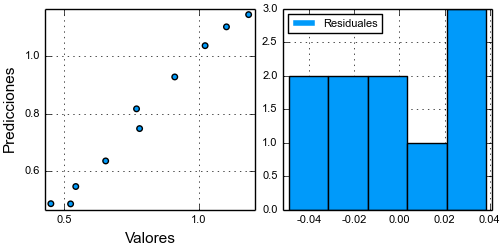

In [14]:
using Plots
pyplot(size=(500,250))

plot(
scatter(Y, Yₚ, legend=false, 
        xlab="Valores", ylab="Predicciones"),
histogram(Eₚ, label="Residuales", bins=5)
)

### Análisis de regresión

[**Supuestos**](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm), muchos de los cuales aplican a los residuos:  

- **Linealidad**: Si no se cumple se comete un error de <a href="https://en.wikipedia.org/wiki/Specification_(regression)">especificación</a>, dado que el modelo será incorrecto. En el caso de una o dos variables independientes, ayuda observar un gráfico de dispersión en busca de una tendencia lineal (línea, plano).   
- **Independencia de los residuos**: Los residuos no deben estar correlacionados (deben ser una variable aleatoria), algo que puede suceder cuando se trabaja con series temporales. El [estadístico de Durbin-Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) puede ayudar en la detección de autocorrelaciones.  
- **Homocedasticidad**: Igualdad de varianza para cada valor o grupo de valores de la/s variable/s independiente/s  
- **Normalidad**: Para cada valor o grupo de valores de la/s variable/s independiente/s los residuos se distribuyen de manera normal con $\mu = 0$   
- **No-colinealidad**: Las variables independientes no pueden ser combinaciones lineales unas de otras, no debe haber correlación entre ellas.   

In [15]:
using GLM

In [16]:
Xₐ = hcat(ones(N), X) # Y = 1*α + β₁X₁ + β₂X₂ + ...

10×3 Array{Float64,2}:
 1.0  0.0307714  0.4821  
 1.0  0.286979   0.558296
 1.0  0.110116   0.287557
 1.0  0.85274    0.191639
 1.0  0.895312   0.764406
 1.0  0.361209   0.230311
 1.0  0.460176   0.601009
 1.0  0.8968     0.892419
 1.0  0.293208   0.97748 
 1.0  0.653764   0.689387

In [17]:
modelo = lm(Xₐ,Y)

GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}}:

Coefficients:
     Estimate Std.Error t value Pr(>|t|)
x1   0.220747 0.0289136 7.63471   0.0001
x2    0.19005 0.0371247 5.11923   0.0014
x3   0.845895 0.0440124 19.2195    <1e-6



In [18]:
residuos = residuals(modelo)

10-element Array{Float64,1}:
  0.018459  
  0.0310968 
 -0.0353076 
 -0.00299254
 -0.015911  
  0.0385749 
 -0.0492571 
  0.0369678 
 -0.00253678
 -0.0190936 

### Mínimos Cuadrados Ponderados.

En el caso de no cumplirse con la homocedacia, es posible darle a cada observación un peso inversamente proporcional a la varianza para ese valor o grupo de valores de la/s variable/s independiente/s en una regresion por [minimos cuadrados ponderados](https://en.wikipedia.org/wiki/Least_squares#Weighted_least_squares). Lo óptimo es conocer de antemano cual es la varianza de cada medición. Por ejemplo si medimos cada dato con una herramienta diferente y conocemos su error. Sino existen maneras de determinar los posibles valores de la varianza (o de un estimador robusto correlacionado con ésta) con respecto a las variables independientes.  

In [19]:
using DataFrames

In [20]:
N = 100
X = rand(N)
β = rand()
α = 5

E = rand(Normal(1,0.5),N) .* X # heterocedasticidad

Y = α + X * β + E

datos = DataFrame(hcat(X, Y))
names!(datos, [:X, :Y])

,X,Y
1,0.7555047802543704,6.1168419478764635
2,0.6500033518030761,6.107586925334288
3,0.7965660071085492,6.266883634304559
4,0.7255222107116668,5.5623703682775245
5,0.4685298886063147,5.42364892432
6,0.40896991632975244,5.576719251621155
7,0.8390647031766272,5.827034024344083
8,0.7184557653175316,5.210219930930277
9,0.10769765132451736,5.0982632537600265
10,0.7988459323955748,6.12960831676362


In [25]:
modelo = glm(@formula(Y ~ X), datos, Normal(), IdentityLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Y ~ 1 + X

Coefficients:
             Estimate Std.Error z value Pr(>|z|)
(Intercept)   5.00851 0.0541294 92.5285   <1e-99
X              1.3304 0.0974747 13.6487   <1e-41


In [26]:
coeficientes = coef(modelo)

2-element Array{Float64,1}:
 5.00851
 1.3304 


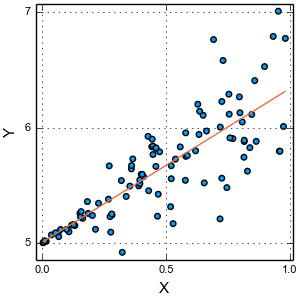

In [29]:
using StatPlots
pyplot(size=(300,300))

scatter(datos, :X, :Y, legend=false)
Plots.abline!(coeficientes[2], coeficientes[1])

In [30]:
residuos = Y - predict(modelo)

100-element Array{Float64,1}:
  0.103207  
  0.234311  
  0.198621  
 -0.411376  
 -0.208195  
  0.0241138 
 -0.297769  
 -0.754125  
 -0.0535298 
  0.058312  
  0.731787  
 -0.140138  
 -0.0110208 
  ⋮         
 -0.518117  
 -0.294746  
 -0.00206862
 -0.348796  
 -0.281484  
  0.175619  
 -0.543289  
 -0.144178  
  0.0167338 
 -0.394444  
 -0.490244  
  0.109015  


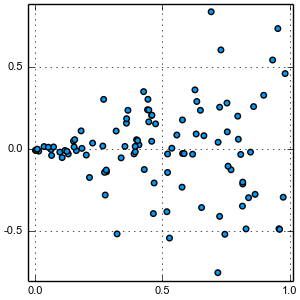

In [31]:
scatter(X, residuos, legend=false)

In [32]:
residuos_modelo = DataFrame(
x = collect(0:0.05:0.8).+0.1, # inicio + paso/2 = centro de la ventana
y = Float64[ mad( residuos[i .<= X .<= i+0.2] ) for i in collect(0:0.05:0.8) ] # paso = 0.2
)

,x,y
1,0.1,0.02213005266994569
2,0.15000000000000002,0.03201768481813598
3,0.2,0.06786344863988106
4,0.25,0.12769986133560404
5,0.30000000000000004,0.1761011520576226
6,0.35,0.22300560057832286
7,0.4,0.16373083687563167
8,0.44999999999999996,0.2042341948078266
9,0.5,0.24453736291451844
10,0.55,0.26127049064212476


In [35]:
modelo = glm(@formula(y ~ x), residuos_modelo, Normal(), IdentityLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + x

Coefficients:
               Estimate Std.Error  z value Pr(>|z|)
(Intercept)  0.00891738 0.0197618 0.451244   0.6518
x              0.423534 0.0354932  11.9328   <1e-32



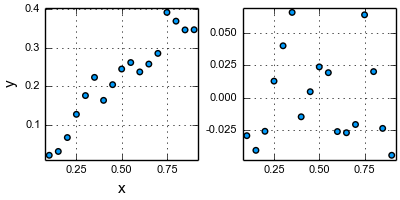

In [36]:
plot(
scatter(residuos_modelo, :x,:y),
scatter(residuos_modelo[:x],residuos_modelo[:y]-predict(modelo)),
legend=false, size=(400,200))

In [37]:
C = coef(modelo)

2-element Array{Float64,1}:
 0.00891738
 0.423534  

In [38]:
pesos = Float64[ 1/(C[1] + C[2]*x) for x in datos[:X] ]

100-element Array{Float64,1}:
  3.04045
  3.51845
  2.88775
  3.16255
  4.82263
  5.49058
  2.74507
  3.19277
 18.3382 
  2.87972
  2.42157
  7.79804
 12.8065 
  ⋮      
  6.85933
  2.37075
 75.7626 
  2.82398
  7.93179
  3.93092
  4.29418
  4.35399
  8.18937
  4.85282
  2.4049 
 11.6218 

In [39]:
lineal_ponderada = glm(@formula(Y ~ X), datos, Normal(), IdentityLink(), wts=pesos)

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Y ~ 1 + X

Coefficients:
             Estimate  Std.Error z value Pr(>|z|)
(Intercept)   5.00158 0.00661172 756.473   <1e-99
X             1.34475   0.020055 67.0529   <1e-99



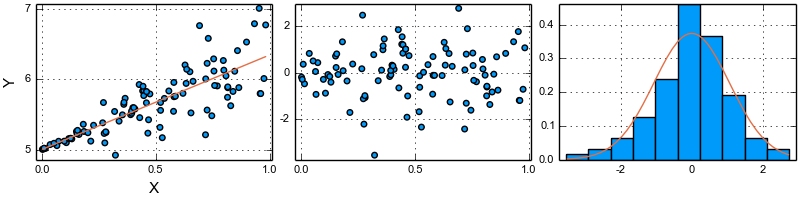

In [40]:
reg_plot = scatter(datos, :X, :Y)
Plots.abline!(reg_plot, coef(lineal_ponderada)[2], coef(lineal_ponderada)[1])

residuos = ( datos[:Y] - predict(lineal_ponderada) ) .* pesos

normal = Normal(0,std(residuos))

res_plot = histogram(residuos, bins=10, normed=true)
plot!(res_plot, res -> pdf(normal, res), minimum(residuos), maximum(residuos))

res_scatter = scatter(datos[:X], residuos)

plot(reg_plot, res_scatter, res_plot, legend=false, size=(800,200), layout=grid(1,3))

En general es preferible usar pesos cuando éstos se conocen de antemano. Por ejemplo si se conoce el error experimental de los instrumentos, B factors o resolución en estructuras cristalográficas, etc.  Tratar de encontrar pesos puede ser complicado. En este caso, los pesos hacen que los residuales ponderados cumplan homocedacia, pero quizás a costa de la normalidad.

### Ridge Regression 

[Ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) en [MultivariateStats](http://multivariatestatsjl.readthedocs.io/en/latest/lreg.html#ridge-regression) y [en ScikitLearn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression).  
Esta regresión es mucho más robusta a la presencia de variables explicativas correlacionadas (colineales).

*Ridge Regression* usando **ScikitLearn.jl**, el valor de α es seleccionado usando *validación cruzada*:

In [41]:
k = 3  # variables independientes
@assert k > 2
N = 10 # observaciones
X = rand(N, k) # simulación: valores observados para las variables independientes
X[:,1] = X[:,1].*X[:,2] + X[:,1] # colineales
α = rand() # simulación: valor real de la intersección
β = rand(k) # simulación: valores reales de los coeficientes
E = 0.1 .* rand(N) # simulación: agrega errores al azar al modelo
Y = α + X * β + E # valores para la variable dependiente con el modelo lineal que acabamos de armar

10-element Array{Float64,1}:
 1.27462 
 1.0329  
 0.8406  
 1.48093 
 0.519938
 0.694567
 1.53851 
 1.98415 
 1.11655 
 0.568023

In [42]:
using ScikitLearn
@sk_import linear_model: RidgeCV

PyObject <class 'sklearn.linear_model.ridge.RidgeCV'>

In [43]:
rcv = RidgeCV(alphas=0.01:0.01:10.0)

PyObject RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0....9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0],
    cv=None, fit_intercept=True, gcv_mode=None, loss_func=None,
    normalize=False, score_func=None, scoring=None, store_cv_values=False)

In [44]:
ScikitLearn.fit!(rcv, X, Y)

PyObject RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0....9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0],
    cv=None, fit_intercept=True, gcv_mode=None, loss_func=None,
    normalize=False, score_func=None, scoring=None, store_cv_values=False)

In [45]:
rcv[:coef_]

3-element Array{Float64,1}:
 0.288703
 0.80839 
 0.58305 

In [46]:
rcv[:intercept_]

0.26559505862944266

In [47]:
α = rcv[:alpha_]

0.01

*Ridge Regression* usando **ScikitLearn.jl**:

In [48]:
@sk_import linear_model: Ridge

PyObject <class 'sklearn.linear_model.ridge.Ridge'>

In [49]:
r = Ridge(alpha = α)

PyObject Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [50]:
ScikitLearn.fit!(r, X, Y)

PyObject Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [51]:
r[:coef_]

3-element Array{Float64,1}:
 0.288703
 0.80839 
 0.58305 

In [52]:
rcv[:intercept_]

0.26559505862944266

*Ridge Regression* usando **MultivariateStats**:

In [53]:
MultivariateStats.ridge(X, Y, α)

4-element Array{Float64,1}:
 0.288703
 0.80839 
 0.58305 
 0.265595

*Ridge Regression* usando **R** and **RCall**:

In [57]:
using RCall

R"""
library(MASS)
lmr <- lm.ridge($Y ~ $X, lambda=$α)
"""

RCall.RObject{RCall.VecSxp}
           `#JL`$X1  `#JL`$X2  `#JL`$X3 
0.2617481 0.2888427 0.8149272 0.5843138 
